**Introdução a modelos de classificação de dados em Machine Learning**
 
Você sabe como funciona um modelo supervisionado de classificação em machine learning? Na aula de hoje vamos aprender a como criar um classificador automático e inteligente utilizando ferramentas de machine learning. Vamos lá? 😀

**Case: Classificação de insetos gafanhotos e esperanças**

Um certo cientista coletou dados de amostra sobre uma população de insetos da espécie gafanhoto e esperança para realizar um estudo e identificar uma forma de encontrar diferenças entre os tipos de insetos analisando algumas das características presentes no corpo dos insetos.

Com base em suas pesquisas e análises, o cientista identificou que as características do tamanho do abdomên e comprimento das antenas desses insetos podem ser um fator muito relevante para a identificação da espécie.

O cientista precisa encontrar uma maneira de identificar de forma **automática e precisa** os padrões dessas características que podem classificar quando um inseto é do tipo gafanhoto ou do tipo esperança.

Vamos aplicar machine learning para resolver esse problema?


In [1]:
import pandas as pd

In [4]:
dados = pd.read_excel('../../../Data/Fase 2/gaf_esp.xlsx')

In [5]:
dados.head()

,Espécie,Comprimento do Abdômen,Comprimento das Antenas
0,Gafanhoto,0.50,7.0
1,Gafanhoto,0.50,6.0
2,Gafanhoto,0.60,5.5
3,Gafanhoto,0.65,4.5
4,Gafanhoto,0.54,3.2


In [6]:
dados.describe()

,Comprimento do Abdômen,Comprimento das Antenas
count,100.000000,100.000000
mean,4.936200,5.382400
std,3.343806,2.296001
min,0.500000,0.890000
25%,1.692500,3.775000
50%,4.500000,5.500000
75%,8.200000,7.000000
max,10.000000,9.700000


In [7]:
dados.groupby('Espécie').describe()

Comprimento do Abdômen                                              \
                           count    mean       std  min    25%    50%    75%   
Espécie                                                                        
Esperança                   50.0  8.1206  1.129729  5.4  7.225  8.200  9.000   
Gafanhoto                   50.0  1.7518  0.786941  0.5  1.200  1.685  2.415   

                Comprimento das Antenas                                       \
            max                   count    mean       std   min    25%   50%   
Espécie                                                                        
Esperança  10.0                    50.0  7.2156  1.334945  4.50  6.205  7.00   
Gafanhoto   3.6                    50.0  3.5492  1.417861  0.89  2.550  3.77   

                     
           75%  max  
Espécie              
Esperança  8.2  9.7  
Gafanhoto  4.3  7.0

**Como funciona o modelo de classificação?**

Vamos observar os dados com o gráfico de dispersão:

<Axes: xlabel='Comprimento do Abdômen', ylabel='Comprimento das Antenas'>

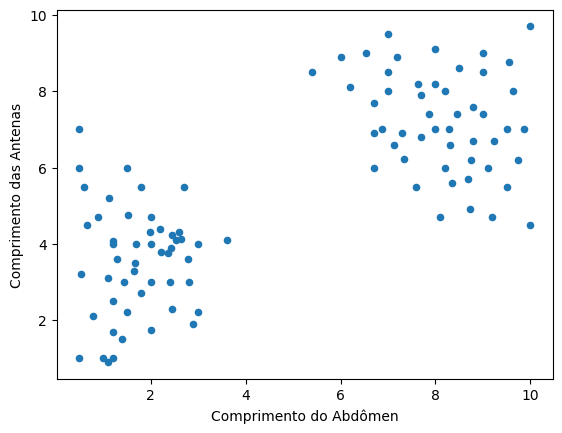

In [8]:
dados.plot.scatter(x='Comprimento do Abdômen', y='Comprimento das Antenas')

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
x = dados[['Comprimento do Abdômen', 'Comprimento das Antenas']]
y = dados['Espécie']

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

In [14]:
list(y_train).count('Gafanhoto')

40

In [15]:
list(y_train).count('Esperança')

40

In [16]:
print("Total base de treino: ", len(x_train))
print("Total base de teste: ", len(y_test))

Total base de treino:  80
Total base de teste:  20


In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# Hiperparametro do nosos modelo é o número de vizinhos considerado (n_neighbors)
modelo_classificador = KNeighborsClassifier(n_neighbors=3)

# Está fazendo o treinamento do meu modelo de ML
modelo_classificador.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [19]:
# Comprimento AB: 8
# Comprimento AT: 6
modelo_classificador.predict([[8,6]]) #type: ignore

/Users/marcelocardoso/Documents/.venv/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Esperança'], dtype=object)

In [20]:
from sklearn.metrics import accuracy_score

In [21]:
y_predito = modelo_classificador.predict(x_test)

In [22]:
accuracy_score(y_true = y_test, y_pred=y_predito)

1.0